In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
df=pd.read_csv('online_shoppers_intention.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [3]:
# преобразуем тип некоторых столбцов ( 'Month', 'VisitorType', 'OperatingSystem', 'Browser') в числовые данные. Это необходимое условие деревьев
from sklearn.preprocessing import LabelEncoder
categorical_columns=['Revenue', 'Weekend']
for col in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    df[col] = encoder.fit_transform(df[col])

Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]


Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]




In [4]:
df['Month'] = df['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.duplicated().value_counts()

False    12205
True       125
dtype: int64

In [7]:
#удалим повторяющиеся значения
df.drop_duplicates(inplace=True)

In [8]:
#для избежания "перевеса" одних объектов над другими, приведем вме объекты к общему масштабу с помощью MinMaxScaler 
cols_to_scale = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [9]:
# Группируем данные по типу трафика
grouped_data = df.groupby('TrafficType')

# Рассчитать средний доход по типу трафика
average_revenue = grouped_data['Revenue'].mean()

# Рассчитать общий доход по типу трафика
total_revenue = grouped_data['Revenue'].sum()

# Сравните доход по типам трафика
revenue_comparison = pd.DataFrame({'Average Revenue': average_revenue, 'Total Revenue': total_revenue})

# выводим сравнение доходов
print(revenue_comparison)

             Average Revenue  Total Revenue
TrafficType                                
1                   0.109715            262
2                   0.216569            847
3                   0.089419            180
4                   0.154784            165
5                   0.215385             56
6                   0.119639             53
7                   0.300000             12
8                   0.276968             95
9                   0.097561              4
10                  0.200000             90
11                  0.190283             47
12                  0.000000              0
13                  0.059066             43
14                  0.153846              2
15                  0.000000              0
16                  0.333333              1
17                  0.000000              0
18                  0.000000              0
19                  0.058824              1
20                  0.259067             50


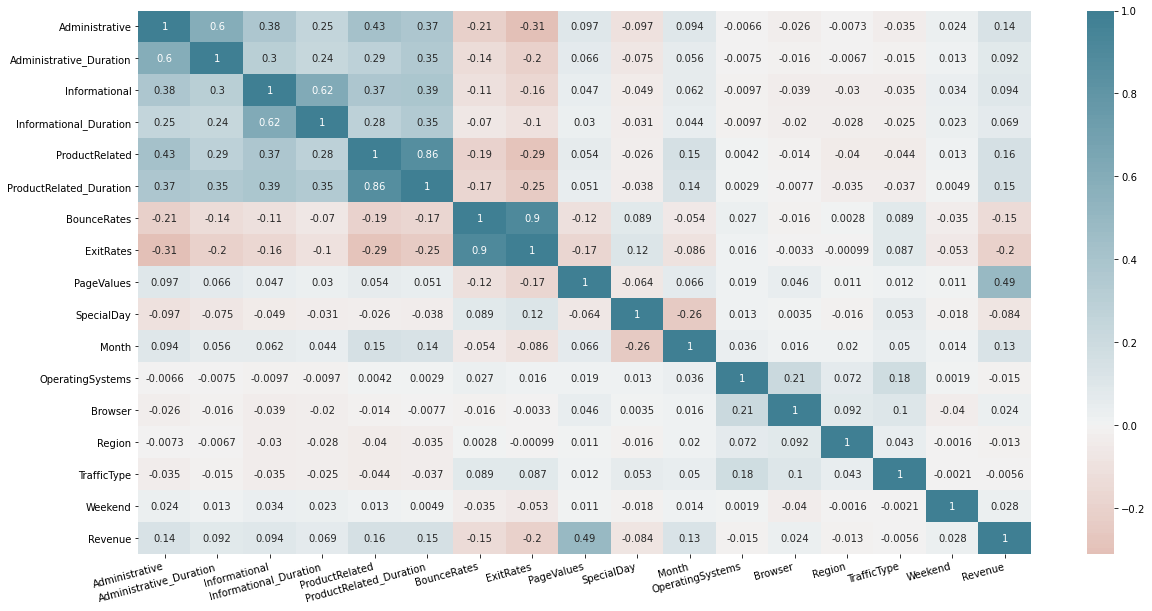

In [10]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df.corr(),cmap=sns.diverging_palette(20, 220, n=200),center = 0,annot=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=15,horizontalalignment='right');

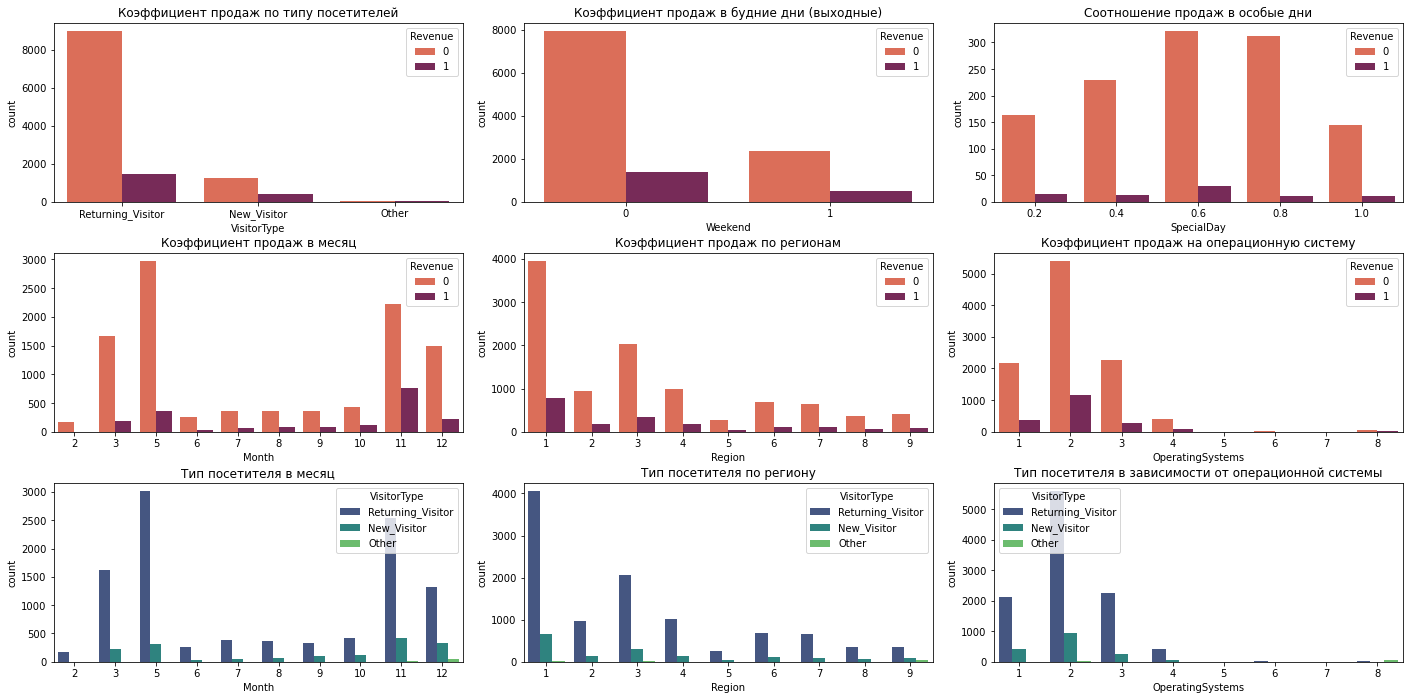

In [11]:
#эффективность продаж по 6 измерениям
fig, ax = plt.subplots(3,3,figsize = (20,10))
plt.tight_layout(pad= 3)

sns.countplot(data = df, x ='Month',hue = 'Revenue',ax =ax[1,0],
             palette = "rocket_r").set_title('Коэффициент продаж в месяц')
sns.countplot(data = df, x ='Weekend',hue = 'Revenue',ax =ax[0,1],
             palette = "rocket_r").set_title('Коэффициент продаж в будние дни (выходные)')
df2 = df[df['SpecialDay']!=0]
sns.countplot(data = df2, x ='SpecialDay',hue = 'Revenue',ax =ax[0,2],
             palette = "rocket_r").set_title('Соотношение продаж в особые дни')
sns.countplot(data = df, x ='VisitorType',hue = 'Revenue',ax =ax[0,0],
             palette = "rocket_r").set_title('Коэффициент продаж по типу посетителей')
sns.countplot(data = df, x ='Region',hue = 'Revenue',ax =ax[1,1],
             palette = "rocket_r").set_title('Коэффициент продаж по регионам')
sns.countplot(data = df, x ='OperatingSystems',hue = 'Revenue',ax =ax[1,2],
             palette = "rocket_r").set_title('Коэффициент продаж на операционную систему')
# тип посетителя по 3 параметрам
sns.countplot(data = df, x ='Month',hue = 'VisitorType',ax =ax[2,0],
             palette = "viridis").set_title('Тип посетителя в месяц');
sns.countplot(data = df, x ='Region',hue = 'VisitorType',ax =ax[2,1],
             palette = "viridis").set_title('Тип посетителя по региону');
sns.countplot(data = df, x ='OperatingSystems',hue = 'VisitorType',ax =ax[2,2],
             palette = "viridis").set_title('Тип посетителя в зависимости от операционной системы');

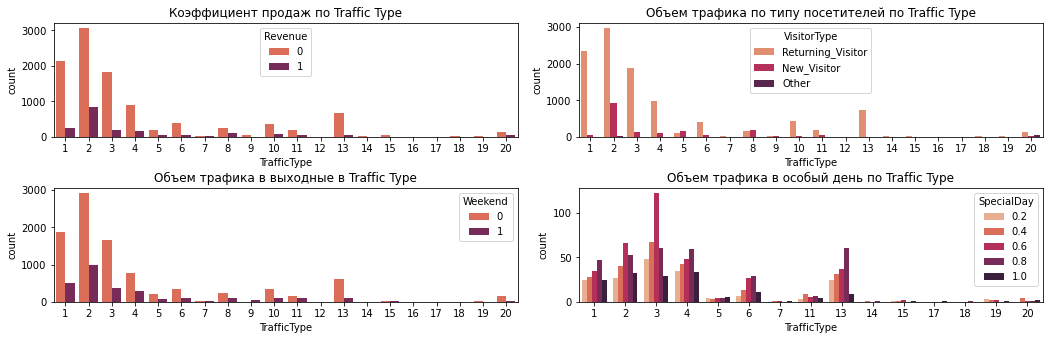

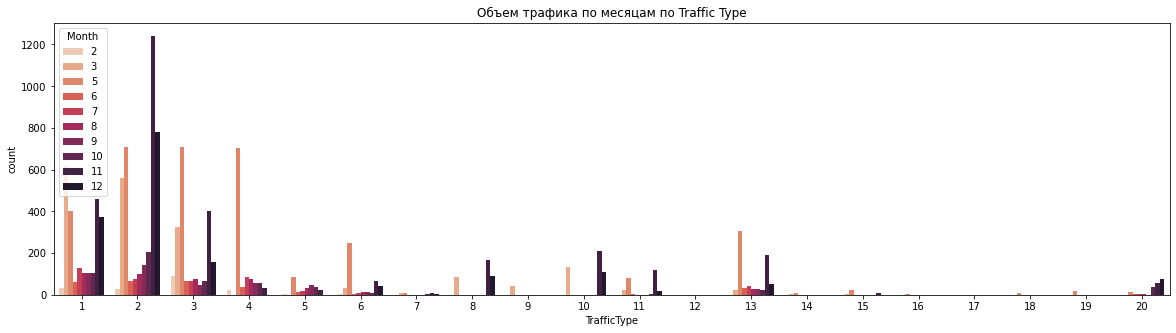

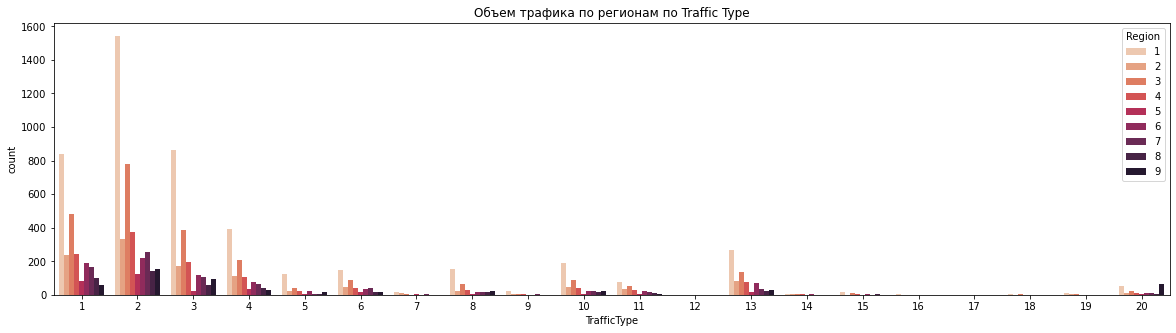

In [12]:
# Исследуем эфективность типов трафика (TrafficType)
fig, ax1 = plt.subplots(2,2,figsize = (15,5))
plt.tight_layout(pad= 3)
fig, ax2 = plt.subplots(1,figsize = (20,5))
fig, ax3 = plt.subplots(1,figsize = (20,5))

sns.countplot(data = df, x ='TrafficType',hue = 'Revenue',ax =ax1[0,0],
              palette="rocket_r").set_title('Коэффициент продаж по Traffic Type')
sns.countplot(data = df, x ='TrafficType',hue = 'VisitorType',ax =ax1[0,1],
             palette="rocket_r").set_title('Объем трафика по типу посетителей по Traffic Type')
sns.countplot(data = df, x ='TrafficType',hue = 'Weekend',ax =ax1[1,0],
              palette="rocket_r").set_title('Объем трафика в выходные в Traffic Type')
sns.countplot(data = df2, x ='TrafficType',hue = 'SpecialDay',ax =ax1[1,1],
             palette="rocket_r").set_title('Объем трафика в особый день по Traffic Type')
sns.countplot(data = df, x ='TrafficType',hue = 'Month',ax =ax2,
             palette="rocket_r").set_title('Объем трафика по месяцам по Traffic Type')
sns.countplot(data = df, x ='TrafficType',hue = 'Region',ax =ax3,
             palette="rocket_r").set_title('Объем трафика по регионам по Traffic Type');

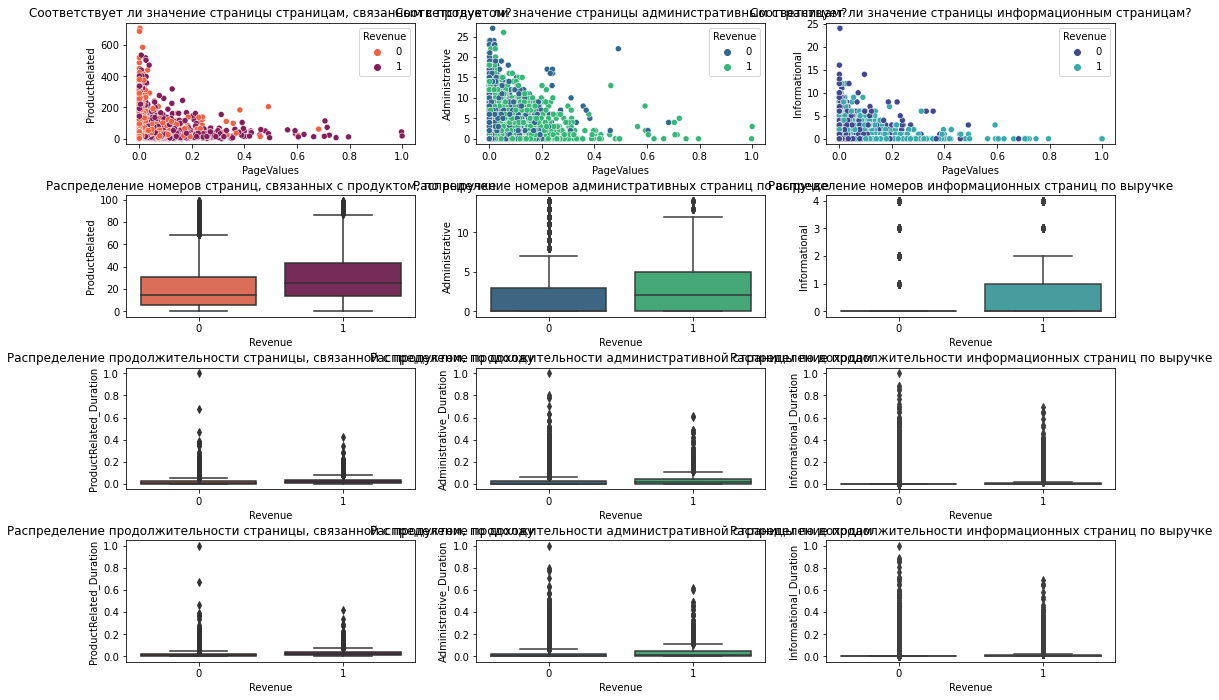

In [13]:
#Как количество посещенных страниц влияет на покупательское поведение?
fig, ax = plt.subplots(4,3, figsize=(15,10))
plt.tight_layout(pad= 3)
sns.scatterplot(data = df, x="PageValues", y="ProductRelated",hue = 'Revenue',ax = ax[0,0],
            palette = "rocket_r").set_title('Соответствует ли значение страницы страницам, связанным с продуктом?')
sns.scatterplot(data = df, x="PageValues", y="Administrative",hue = 'Revenue',ax = ax[0,1],
            palette = "viridis").set_title('Соответствует ли значение страницы административным страницам?')
sns.scatterplot(data = df, x="PageValues", y="Informational",hue = 'Revenue',ax = ax[0,2],
            palette = "mako").set_title('Соответствует ли значение страницы информационным страницам?')

#более подробный ассортимент([0,100],[0,15],[0,5] )
df6 = df[df["ProductRelated"]<100]
sns.boxplot(data = df6, x="Revenue",y="ProductRelated",ax = ax[1,0],
           palette = "rocket_r").set_title('Распределение номеров страниц, связанных с продуктом, по выручке')
df7 = df[df["Administrative"]<15]
sns.boxplot(data = df7, x="Revenue",y="Administrative",ax = ax[1,1],
           palette = "viridis").set_title('Распределение номеров административных страниц по выручке')
df8 = df[df["Informational"]<5]
sns.boxplot(data = df8, x="Revenue",y="Informational",ax = ax[1,2],
           palette = "mako").set_title('Распределение номеров информационных страниц по выручке')

#В каком диапазоне продолжительность на странице может способствовать покупательскому поведению?
sns.boxplot(data = df, x="Revenue",y="ProductRelated_Duration",ax = ax[2,0],
           palette = "rocket_r").set_title('Распределение продолжительности страницы, связанной с продуктом, по доходу')
sns.boxplot(data = df, x="Revenue",y="Administrative_Duration",ax = ax[2,1],
           palette = "viridis").set_title('Распределение продолжительности административной страницы по доходам')
sns.boxplot(data = df, x="Revenue",y="Informational_Duration",ax = ax[2,2],
           palette = "mako").set_title('Распределение продолжительности информационных страниц по выручке')

#более подробный ассортимент (duration [0,3500], [0,300], [0,300])
df3 = df[df["ProductRelated_Duration"]<3500]
sns.boxplot(data = df3, x="Revenue",y="ProductRelated_Duration",ax = ax[3,0],
           palette = "rocket_r").set_title('Распределение продолжительности страницы, связанной с продуктом, по доходу')
df4 = df[df["Administrative_Duration"]<300]
sns.boxplot(data = df4, x="Revenue",y="Administrative_Duration",ax = ax[3,1],
           palette = "viridis").set_title('Распределение продолжительности административной страницы по доходам')
df5 = df[df["Informational_Duration"]<300]
sns.boxplot(data = df5, x="Revenue",y="Informational_Duration",ax = ax[3,2],
           palette = "mako").set_title('Распределение продолжительности информационных страниц по выручке');


### Обработаем дисбаланс

In [14]:
df['Revenue'].value_counts()

0    10297
1     1908
Name: Revenue, dtype: int64

In [15]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [16]:
print('y_train.value_counts:',y_train.value_counts())
print('y.value_counts:', y.value_counts())
print('y_test.value_counts:', y_test.value_counts())
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

y_train.value_counts: 0    8238
1    1526
Name: Revenue, dtype: int64
y.value_counts: 0    10297
1     1908
Name: Revenue, dtype: int64
y_test.value_counts: 0    2059
1     382
Name: Revenue, dtype: int64
X_train.shape: (9764, 17)
X_test.shape: (2441, 17)


In [17]:
from imblearn.over_sampling import SMOTE

#Выполните однократное кодирование категориальных функций
X_encoded = pd.get_dummies(X)

#Примените SMOTE к закодированным функциям и целевой переменной
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_encoded, y)

# Преобразуйте передискретизированную целевую переменную в серию pandas
y_sm = pd.Series(y_sm)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)
y_train.value_counts()


1    8238
0    8237
Name: Revenue, dtype: int64

### Сравнение моделей машинного обучения

In [18]:
import pandas as pd 
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [02:33<00:04,  4.80s/it]

[LightGBM] [Info] Number of positive: 8238, number of negative: 8237
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2159
[LightGBM] [Info] Number of data points in the train set: 16475, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500030 -> initscore=0.000121
[LightGBM] [Info] Start training from score 0.000121


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:34<00:00,  5.32s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.94               0.94     0.94      0.94   
RandomForestClassifier             0.94               0.94     0.94      0.94   
XGBClassifier                      0.93               0.93     0.93      0.93   
LGBMClassifier                     0.93               0.93     0.93      0.93   
BaggingClassifier                  0.93               0.93     0.93      0.93   
AdaBoostClassifier                 0.91               0.91     0.91      0.91   
LabelSpreading                     0.90               0.90     0.90      0.90   
LabelPropagation                   0.90               0.90     0.90      0.90   
DecisionTreeClassifier             0.90               0.90     0.90      0.90   
SVC                                0.90               0.90     0.90      0.90   
KNeighborsClassifier        

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train, y_train)

# Делайте прогнозы на тестовом наборе и оценивайте производительность модели
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9346928866229668
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2060
           1       0.92      0.96      0.94      2059

    accuracy                           0.93      4119
   macro avg       0.94      0.93      0.93      4119
weighted avg       0.94      0.93      0.93      4119



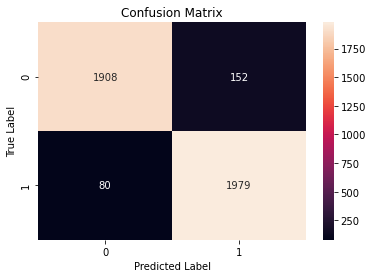

In [24]:
from sklearn.metrics import confusion_matrix
dd = confusion_matrix(y_test, y_pred)

sns.heatmap(dd, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)
y_pred = et.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred)
print('Extra Trees Accuracy:', accuracy_et)

print(f'Accuracy: {accuracy_et}')
print(classification_report(y_test, y_pred))

Extra Trees Accuracy: 0.9436756494294731
Accuracy: 0.9436756494294731
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2060
           1       0.93      0.96      0.94      2059

    accuracy                           0.94      4119
   macro avg       0.94      0.94      0.94      4119
weighted avg       0.94      0.94      0.94      4119



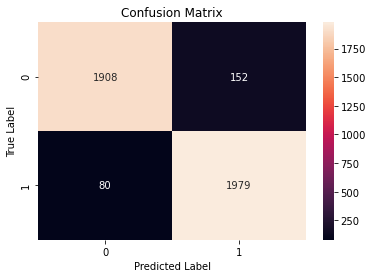

In [26]:
from sklearn.metrics import confusion_matrix
dd = confusion_matrix(y_test, y_pred)
sns.heatmap(dd, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()